In [ ]:
########################################################################
# Author    : J. Kotah
# Date      : Jan 2024
# Dataset   : Visium Spatial Transcriptomics for MS lesions
# Purpose   : create a dotplot of the information obtained from metascape.org

# Required inputs:
# - indir: directory with excel file generated by metascape.org , default settings.
# - PL_active_up_metascape_result.xlsx; PL_act.inact_up_metascape_result.xlsx: results from metascape.org
# Output    : PDF file with dotplot
########################################################################

In [1]:
rm(list=ls())
library(gprofiler2)
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(readxl)
indir = "<your_indir>"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.1”
Warning message:
“package ‘readxl’ was built under R version 4.2.1”


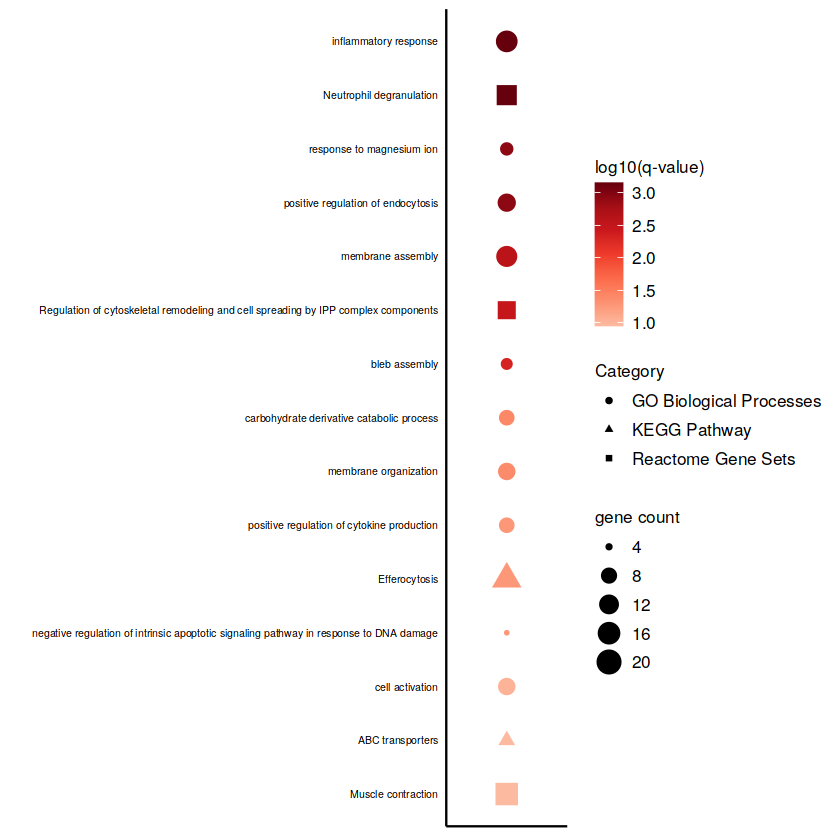

In [3]:
# custom plot lay-out
ggplot.theme <- theme( #legend.position = "none",
                    text = element_text(hjust = 0.5, face = "plain", size = (9)),
                    plot.title = element_text(hjust = 0.5, face = "plain", size = (16)),
                    axis.title.x = element_blank(),
                    axis.title.y = element_text(face = "plain", size = (12)),
                    axis.text = element_text(face = "plain", size = (12), colour = "black"),
                    axis.text.x = element_blank(),
                    axis.text.y = element_text(size = 6), 
                    axis.ticks = element_blank(),
                    plot.subtitle = element_text(hjust = 0.5),
                    panel.background = element_blank(),
                    panel.border = element_blank(),
                    panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                    panel.grid = element_blank(),
                    axis.line = element_line(color = "black"),
                    plot.background = element_rect(fill="transparent", color=NA),
                    legend.key = element_rect(fill="transparent", color="transparent"),
                    legend.box.background = element_rect(fill="transparent", color="transparent"),
                    legend.background = element_rect(fill="transparent", color="transparent"),
                    legend.text=element_text(size=10),
                    legend.title = element_text(size=10))

# colors for significance: PLWM-active
color_scale = c('#fcbba1','#fc9272','#fb6a4a','#ef3b2c','#cb181d','#a50f15','#67000d') 

# load data
metascape = readxl::read_excel(paste0(indir, "PL_active_up_metascape_result.xlsx"), sheet = "Enrichment")
colnames(metascape)[6] <- "LogQ"
metascape <- metascape[grepl("Summary", metascape$GroupID) , ]

# organize data
metascape_plot = metascape %>% data.frame() %>% mutate(qVal = -1* LogQ) %>%
  tidyr::separate(InTerm_InList, into = c("InTerm", "InList"), sep = "/") %>% mutate(InTerm = as.numeric(InTerm)) %>%
  group_by(Category) %>% slice_max(n = 10, order_by = qVal) %>% arrange(desc(qVal))

# plot
metascape_plot$Description <- factor(metascape_plot$Description, levels = rev(metascape_plot$Description)) 
ggplot(metascape_plot, aes(x = 1, y = Description, size = InTerm, color = qVal, shape = Category)) + geom_point() +
  theme_classic() + ylab("") + xlab("") + labs(col = "log10(q-value)", size = "gene count") +
  scale_color_gradientn(colors = color_scale) + ggplot.theme

[1] "#FEBF4B" "#FEB844" "#FEB13E" "#FEAA38" "#FEA332" "#FE9C2C" "#FC9527"
 [8] "#F98E23" "#F68820" "#F3811D" "#F07A19" "#ED7416" "#EA6D12" "#E4670F"
[15] "#DF620D" "#DA5C0A" "#D55607" "#CF5004" "#C94B02" "#C14702" "#B94302"
[22] "#B03F03" "#A83B03" "#A03703" "#973304" "#8F3104"

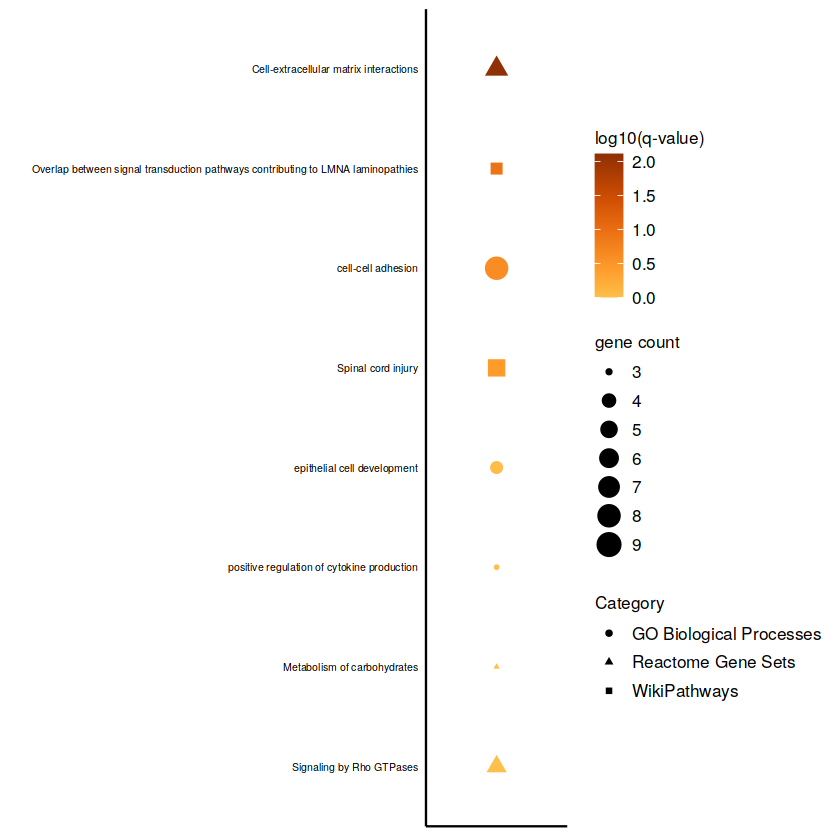

In [4]:
# colors for significance: PLWM-act/inact
color_scale = colorRampPalette(brewer.pal(n = 9, name ="YlOrBr"))(50)
color_scale = color_scale[20:45]
color_scale

# load data
metascape = readxl::read_excel(paste0(indir, "PL_act.inact_up_metascape_result.xlsx"), sheet = "Enrichment")
colnames(metascape)[6] <- "LogQ"
metascape <- metascape[grepl("Summary", metascape$GroupID) , ]

# organize data
metascape_plot = metascape %>% data.frame() %>% mutate(qVal = -1* LogQ) %>%
  tidyr::separate(InTerm_InList, into = c("InTerm", "InList"), sep = "/") %>% mutate(InTerm = as.numeric(InTerm)) %>%
  group_by(Category) %>% slice_max(n = 10, order_by = qVal) %>% arrange(desc(qVal))
metascape_plot$Description <- factor(metascape_plot$Description, levels = rev(metascape_plot$Description)) 

# plot data
ggplot(metascape_plot, aes(x = 1, y = Description, size = InTerm, color = qVal, shape = Category)) + geom_point() +
  theme_classic() + ylab("") + xlab("") + labs(col = "log10(q-value)", size = "gene count") +
  scale_color_gradientn(colors = color_scale) + ggplot.theme


In [5]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/bcn/p283607/anaconda3/envs/R4.2/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] readxl_1.4.1       RColorBrewer_1.1-3 ggplot2_3.4.4      dplyr_1.1.4       
[5] gprofiler2_0.2.2  

loaded via a namespace (and not attached):
 [1] cellranger_1.1.0  pillar_1.9.0      compiler_4.2.0    base64enc_0.1-3  
 [5] tools_4.2.0       digest_0.6.33     uuid_1.1-0        viridisLite_0.4.2
 